 # 1. Importing essential libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Reading the dataset

In [100]:

data=pd.read_csv('Social_Network_Ads.csv')

In [25]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


 Removing the 'User ID' column as it is a unique identifier and not useful for model training

In [26]:
data = data.drop('User ID', axis=1)

In [27]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [28]:
data.tail()

,Gender,Age,EstimatedSalary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


In [76]:
# Quick summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    int32  
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 11.1 KB


In [75]:
# Statistical information of the dataset
data.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,4.000000e+02,4.000000e+02,400.000000
mean,0.490000,-7.105427e-17,-1.776357e-17,0.357500
std,0.500526,1.001252e+00,1.001252e+00,0.479864
min,0.000000,-1.877311e+00,-1.607506e+00,0.000000
25%,0.000000,-7.550313e-01,-7.852897e-01,0.000000
50%,0.000000,-6.256110e-02,7.561451e-03,0.000000
75%,1.000000,7.970571e-01,5.361289e-01,1.000000
max,1.000000,2.134241e+00,2.356750e+00,1.000000


In [31]:
data.describe(include="O")


,Gender
count,400
unique,2
top,Female
freq,204


In [34]:
# Count gender values
Gender_counts = data.Gender.value_counts()

In [35]:
Gender_counts

Gender
Female    204
Male      196
Name: count, dtype: int64

 ## Domain Analysis: Social Network Ads Dataset



 🌐 1. Domain Name
**Digital Marketing / E-commerce / Online Advertising**

This dataset belongs to the domain of **social media advertising**, where companies aim to predict user behavior based on demographics in order to optimize ad targeting and sales conversion.

---

🎯 2. Business Objective
The goal is to **predict whether a user will purchase a product** after seeing a social media advertisement, based on:
- Age
- Estimated Salary
- Gender

This helps businesses:
- Target the right audience
- Reduce ad spend
- Increase ROI

---

 📊 3. Dataset Features

| Column Name       | Description                                      | Type    |
|-------------------|--------------------------------------------------|---------|
| `User ID`         | Unique identifier for each user (not used in ML) | Integer |
| `Gender`          | Gender of the user (`Male` / `Female`)           | Object  |
| `Age`             | Age of the user in years                         | Integer |
| `EstimatedSalary` | Annual income estimate (in INR)                  | Integer |
| `Purchased`       | Target variable: `1` = Purchased, `0` = Not      | Integer |

---

 🧠 4. Feature-Level Domain Insights

- **Age:**  
  Age group may correlate with buying behavior. Younger or middle-aged users might have different ad responsiveness.

- **EstimatedSalary:**  
  Often used as a proxy for income level. Users with higher salaries may have more purchasing power.

- **Gender:**  
  Behavioral trends may differ between genders depending on the product advertised.

- **Purchased (Target):**  
  Binary classification target — ideal for logistic regression models.

---

 💡 5. Applications in Real Life

- **Ad Targeting Optimization:** Deliver ads to users most likely to purchase.
- **Budget Efficiency:** Reduce wasted spend on uninterested users.
- **Customer Segmentation:** Group users by demographic and behavioral traits.
- **Predictive Modeling:** Build ML models to automate targeting.

---

 ✅ 6. Suitability for Logistic Regression

- The dataset has a **binary target (`Purchased`)**.
- Features are mostly **numerical** or easily converted to numeric (e.g., `Gender`).
- Ideal for building a **logistic regression model** to predict purchase probability.

---


## 3. Data Visualization and Exploratory Data Analysis (EDA)


In [36]:
import sweetviz as sv

In [38]:
report= sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Text(0.5, 1.0, 'Target Variable Distribution')

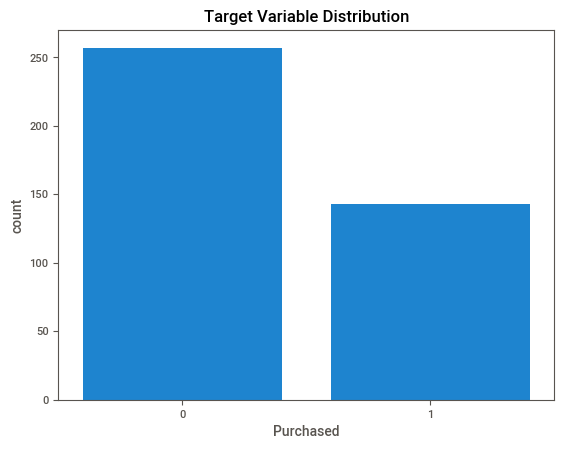

In [81]:
# Plot target variable distribution
sns.countplot(x='Purchased', data=data)
plt.title("Target Variable Distribution")

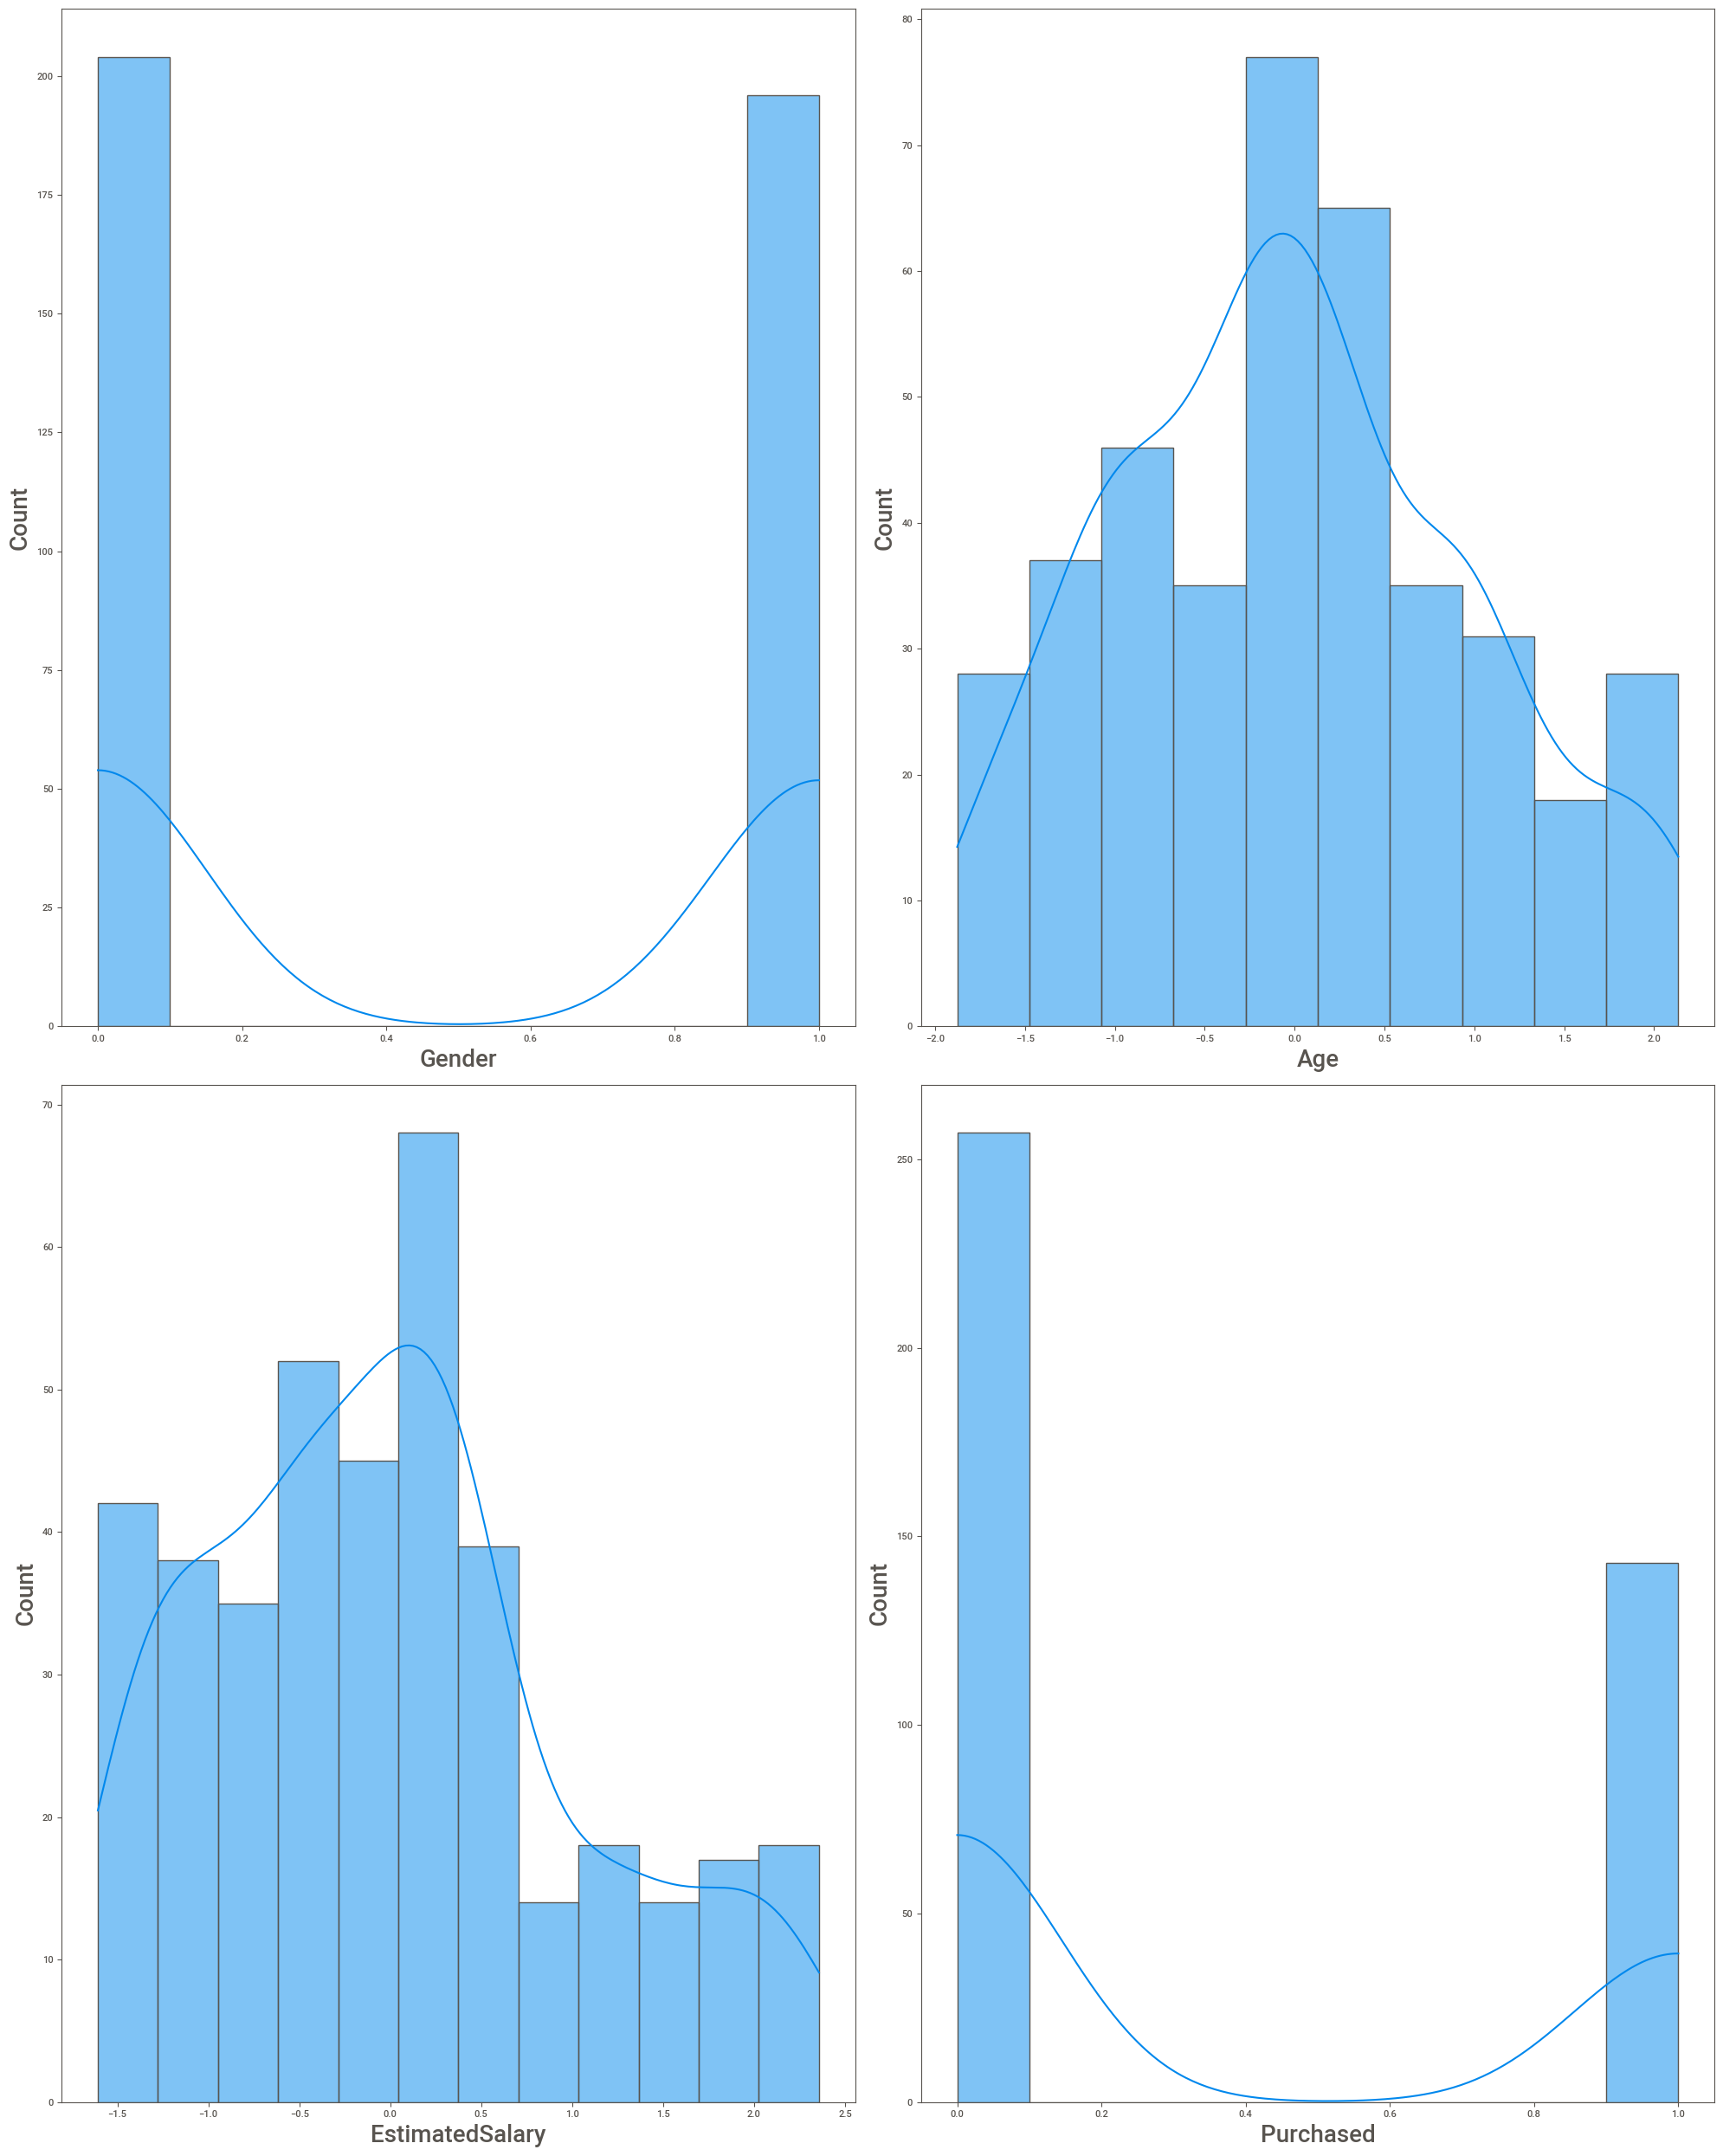

In [78]:
# Bivariate Analysis
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.histplot(x=data[column], kde=True)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Count', fontsize=20)  # Correct label
        plotnumber += 1

plt.tight_layout()
plt.show()


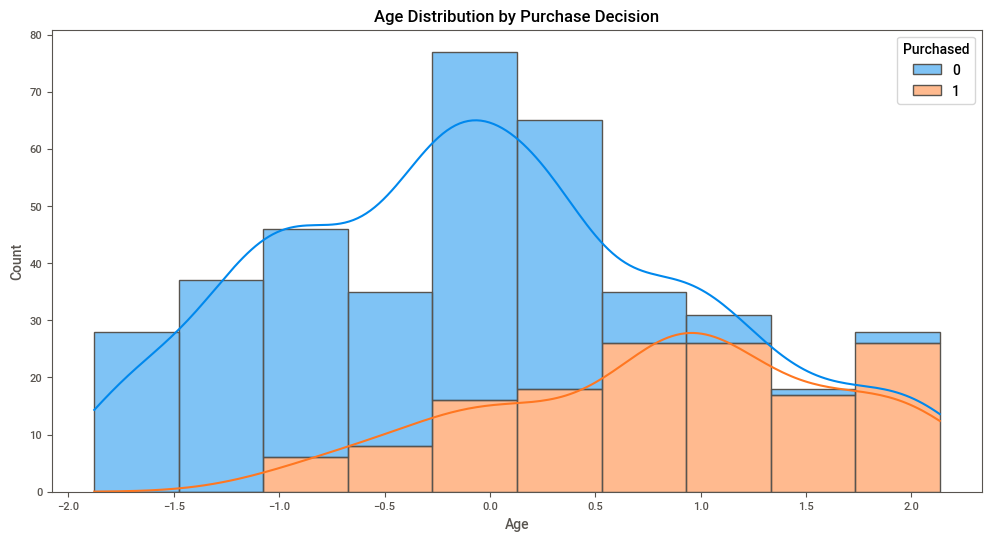

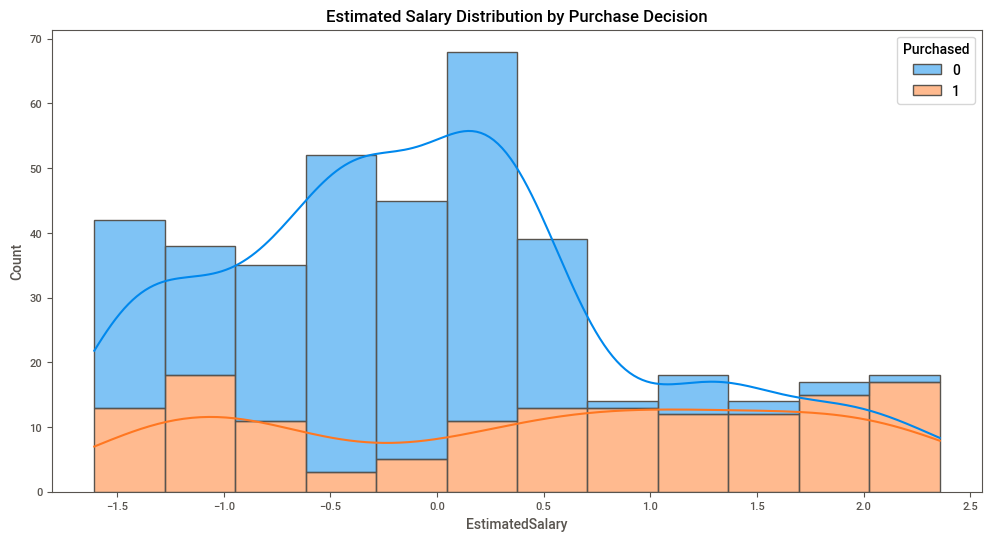

In [85]:
# Distribution of features colored by target
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='Purchased', kde=True, multiple='stack')
plt.title("Age Distribution by Purchase Decision")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='EstimatedSalary', hue='Purchased', kde=True, multiple='stack')
plt.title("Estimated Salary Distribution by Purchase Decision")
plt.show()


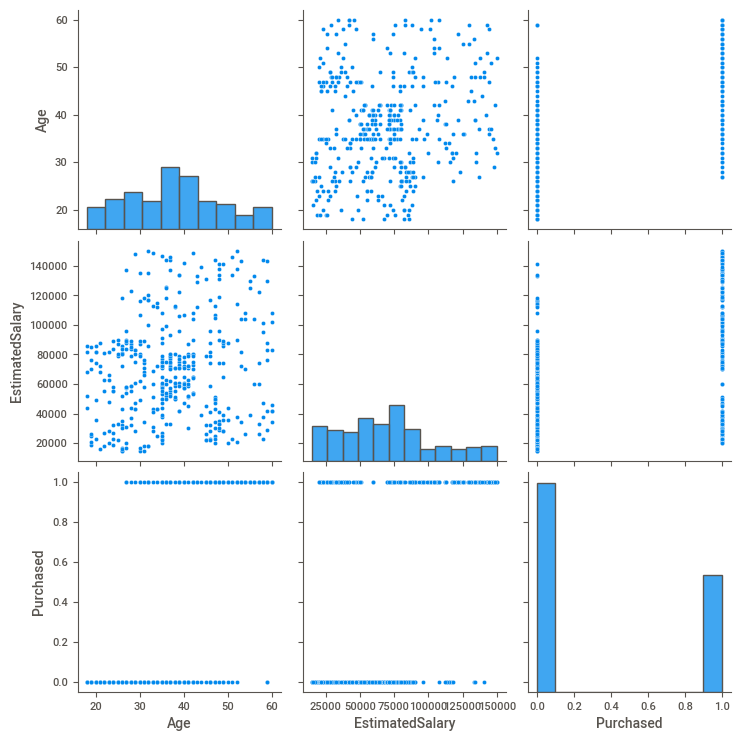

In [41]:
## Step 3 Multivariate Analysis
sns.pairplot(data)

In [42]:
data.isnull().sum() # Checking missing values in each column

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [43]:
data.shape # checking shape of the dataset

(400, 4)

## 4. Data Preprocessing


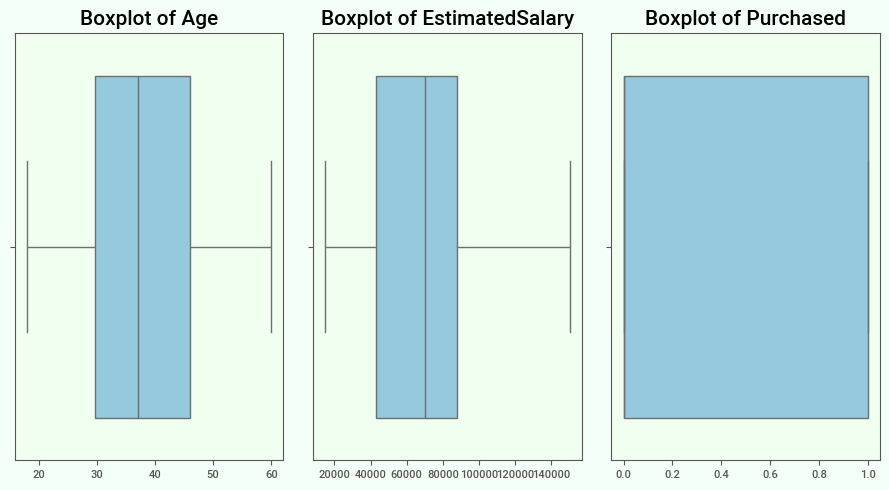

In [52]:
# Set figure size and background color
plt.figure(figsize=(9, 5), facecolor='mintcream')
plotnumber = 1

# Loop through all numeric columns
for column in data.select_dtypes(include='number').columns:
    ax = plt.subplot(1, 3, plotnumber)
    ax.set_facecolor('honeydew')
    
    sns.boxplot(x=data[column], color='skyblue', ax=ax)
    plt.title(f'Boxplot of {column}', fontsize=15)
    plt.xlabel('')
    
    plotnumber += 1

plt.tight_layout()
plt.show()


 No outliers detected in the numeric columns as shown in the boxplots


In [101]:
# Note: Use OneHotEncoder for better performance with non-ordinal data
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)


In [88]:
data.head()

,Age,EstimatedSalary,Purchased,Gender_1
0,-1.781797,-1.490046,0,True
1,-0.253587,-1.460681,0,True
2,-1.113206,-0.785290,0,False
3,-1.017692,-0.374182,0,False
4,-1.781797,0.183751,0,True


In [102]:
# Standardizing the feature values to bring them to a similar scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'EstimatedSalary']] = scaler.fit_transform(data[['Age', 'EstimatedSalary']])


In [103]:
print(data.head())



    User ID       Age  EstimatedSalary  Purchased  Gender_Male
0  15624510 -1.781797        -1.490046          0         True
1  15810944 -0.253587        -1.460681          0         True
2  15668575 -1.113206        -0.785290          0        False
3  15603246 -1.017692        -0.374182          0        False
4  15804002 -1.781797         0.183751          0         True


Display summary statistics (count, mean, std, min, max, percentiles) 
 for the scaled 'Age' and 'EstimatedSalary' columns to verify standardization

In [104]:
print(data[['Age', 'EstimatedSalary']].describe())


                Age  EstimatedSalary
count  4.000000e+02     4.000000e+02
mean  -7.105427e-17    -1.776357e-17
std    1.001252e+00     1.001252e+00
min   -1.877311e+00    -1.607506e+00
25%   -7.550313e-01    -7.852897e-01
50%   -6.256110e-02     7.561451e-03
75%    7.970571e-01     5.361289e-01
max    2.134241e+00     2.356750e+00


## 5. Model Training


## 5.1 Split data

In [92]:
#Split your data into training and testing sets:

from sklearn.model_selection import train_test_split

X = data.drop('Purchased', axis=1)
y = data['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.2 Train Logistic Regression

In [93]:
#Train your Logistic Regression model:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 5.3 Check for Overfitting


Comparing train vs test accuracy helps detect overfitting.
If training accuracy is high and test accuracy is low → overfit.

In [111]:
# Check for overfitting
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))


Training Accuracy: 0.821875
Testing Accuracy: 0.8875


### 5.4 Feature Importance Visualization

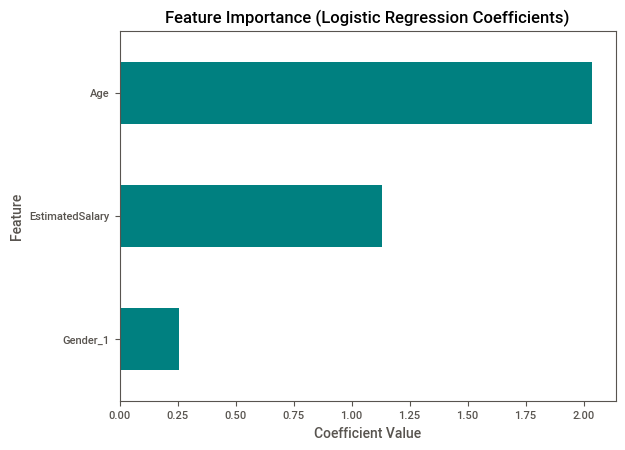

In [113]:
#Visualizing the importance of features based on the logistic regression coefficients.
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

## 6. Predictions and Evaluation


In [105]:
# Evaluate the model:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)


# Evaluating the model performance using accuracy, confusion matrix, and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print('\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8875


Confusion Matrix:
 [[50  2]
 [ 7 21]]


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



## 7. Cross-Validation


In [106]:
from sklearn.model_selection import cross_val_score

# 5-Fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.7    0.95   0.925  0.8125 0.7125]
Mean CV Accuracy: 0.8200000000000001


## 8. ROC Curve


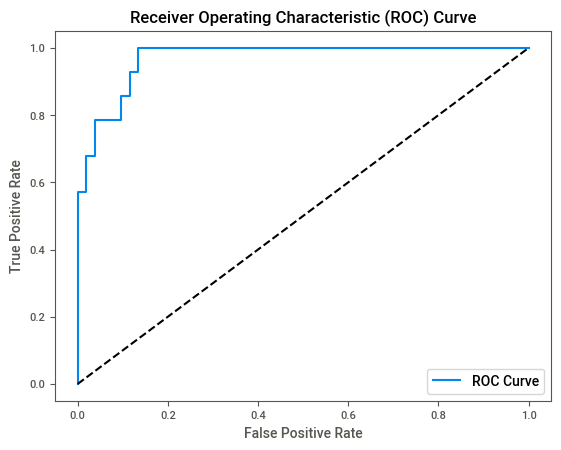

AUC Score: 0.9690934065934066


In [109]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_probs))


## 9. Final Summary


 Summary

- Logistic Regression was applied to predict whether users purchased the product based on Age, Gender, and Estimated Salary.
- Model achieved **~89% accuracy**.
- ROC Curve and AUC show good performance.
- Cross-validation confirms the model is stable across different data splits.
- Future scope: Try other models like Random Forest, SVM, or XGBoost for comparison.
